In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score


In [5]:
c = pd.read_csv('../Carseats.csv')
c.dropna() 
c.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
c1 = c.drop(['ShelveLoc', 'Urban', 'US','CompPrice','Price'], axis=1)

ss = StandardScaler()
car1s = pd.DataFrame(ss.fit_transform(c1))
car1s.columns = c1.columns
## 군집화 수행 - 5개로
model = KMeans(n_clusters = 5)
model.fit(car1s)
predict = pd.DataFrame(model.predict(car1s))
predict.columns=['Sales','Income','Population']
car1sp = pd.concat([car1s,predict], axis=1)

car1sp.head()




,Sales,Income,Advertising,Population,Age,Education,Sales
0,0.710376,0.155361,0.657177,0.075819,-0.699782,1.184449,0
1,1.320179,-0.739060,1.409957,-0.032882,0.721723,-1.490113,4
2,0.908917,-1.204159,0.506621,0.028262,0.350895,-0.725953,4
3,-0.034151,1.121336,-0.396715,1.366649,0.103677,0.038208,3
4,-1.186395,-0.166631,-0.547271,0.510625,-0.947000,-0.343872,3


In [13]:

gm = GaussianMixture(n_components=20, n_init=10)
gm.fit(predict)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  lab

GaussianMixture(n_components=20, n_init=10)

In [16]:
gm.predict(predict)

array([14,  9,  9,  4,  4, 14,  7,  9,  7,  7,  9,  9,  4, 14, 14, 14,  4,
        9, 14,  7, 14, 14,  4,  4,  9,  3,  9,  7,  4, 14,  9, 14,  4, 14,
        4, 14, 14,  4,  4,  3,  7,  4,  3,  3,  4,  3, 14,  7,  4,  3,  4,
        7,  3, 14,  7, 14, 14,  7, 14,  7,  9,  3,  4,  7, 14,  3, 14, 14,
        9,  4,  9, 14,  3,  9,  7,  9, 14, 14,  7,  3,  9,  7, 14,  4,  3,
        7, 14, 14,  7,  4,  4,  4,  7,  3,  7,  4, 14,  3,  9,  3,  7,  3,
        3,  7,  4,  7,  4,  7,  4, 14,  3,  7,  7,  4,  7,  3,  7,  4,  7,
        7,  7,  9,  7,  3,  7,  3, 14,  3,  7,  7,  9,  7,  7,  7,  4, 14,
        3,  4,  9,  9, 14,  3,  7,  3,  3, 14,  4, 14,  7,  9,  9, 14,  7,
        4, 14,  7,  3,  9,  9,  3,  4,  4,  4,  3,  3,  3,  9,  7,  7, 14,
        4, 14, 14, 14,  4,  3,  9,  3,  9,  3,  7,  7,  3,  4,  3,  9,  3,
        3,  4,  9,  9,  4,  4,  9,  9,  7,  4,  4,  4,  7,  7,  3,  4,  3,
        3,  3,  7,  7,  4,  4,  4,  9,  9,  9,  7,  7,  3,  4,  9, 14,  9,
        7,  7,  4,  4,  3

In [18]:
gm.predict_proba(predict)

array([[8.8817842e-17, 8.8817842e-17, 8.8817842e-17, ..., 8.8817842e-17,
        8.8817842e-17, 8.8817842e-17],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [8.8817842e-17, 8.8817842e-17, 8.8817842e-17, ..., 8.8817842e-17,
        8.8817842e-17, 8.8817842e-17],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

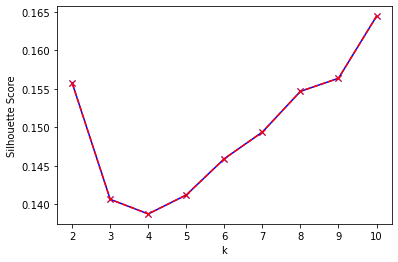

In [23]:
si = list()
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(car1s)
    predict = pd.DataFrame(km.predict(car1s))
    predict.columns = ['predict']
    si.append(silhouette_score(car1s, predict, metric='euclidean'))
    
    
plt.plot(K, si, 'bx-')
plt.plot(K, si, 'rx--')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

In [24]:
###군집화는 4개로 묶어서 시행

In [26]:
bgm = BayesianGaussianMixture(n_components=4, n_init=10)
bgm.fit(predict)
np.round(bgm.weights_, 2)

array([0.33, 0.37, 0.3 , 0.  ])

In [28]:
clus = bgm.predict(predict)

unique, counts = np.unique(clus, return_counts=True)
dict(zip(unique, counts))

{0: 111, 1: 164, 2: 125}

In [33]:
predict['Label'] = clus
predict.columns = predict.columns.get_level_values(0)
grouped = predict.groupby('Label')
grouped.mean()

,predict
Label,
0,4.990991
1,1.536585
2,8.048000
